# EDA Demo: California Housing Dataset

**Goal:** Apply the "EDA Loop" to a real dataset.
1.  **Inspect** structure and types.
2.  **Univariate:** Understand distributions (and catch data errors).
3.  **Bivariate:** Understand relationships (and handle overplotting).
4.  **Multivariate:** Spatial analysis.

**The Dataset:**
Census data from California (1990). We are trying to understand what drives `MedianHouseValue`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme for the lecture
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

# Quick look at the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Dataset Feature Descriptions
* **MedInc:** Median income in block group (in tens of thousands of dollars).
* **HouseAge:** Median house age in block group.
* **AveRooms:** Average number of rooms per household.
* **AveBedrms:** Average number of bedrooms per household.
* **Population:** Block group population.
* **AveOccup:** Average number of household members.
* **Latitude/Longitude:** Block group coordinates.
* **MedHouseVal:** (Target) Median house value (in hundreds of thousands of dollars).

## 1. The "Sanity Check"
Before plotting, we check the basics:
* Do we have missing values?
* Do the data types make sense?
* Do the summary statistics look "real"?

In [ ]:
# Check for missing values and data types
print(df.info())

# Summary statistics
# PAY ATTENTION TO: Min, Max, and Mean. Do they make sense?
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Observation:**
* `AveRooms`: The max is ~141 rooms? That looks like an outlier or data error.
* `MedHouseVal`: The max is exactly 5.0000. This is suspicious (censored data?).

## 2. Univariate Analysis: Distributions
Let's look at our target variable: `MedHouseVal`.

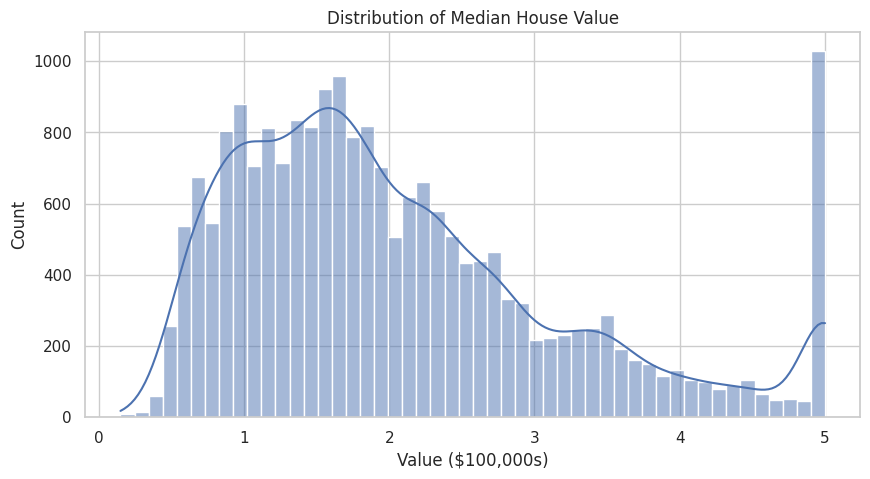

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Value ($100,000s)")
plt.show()

**Reasoning:**
Notice the spike at the far right (5.0)?
* This confirms **Censoring**: The data collection agency capped high-value houses at $500k.
* *Action:* If we use this for ML later, this spike will confuse our model. We must be aware of it.

### Boxplots vs. Violin Plots
Let's look at `HouseAge`.
First, the Boxplot (Standard).
Then, the Violin Plot (Density).

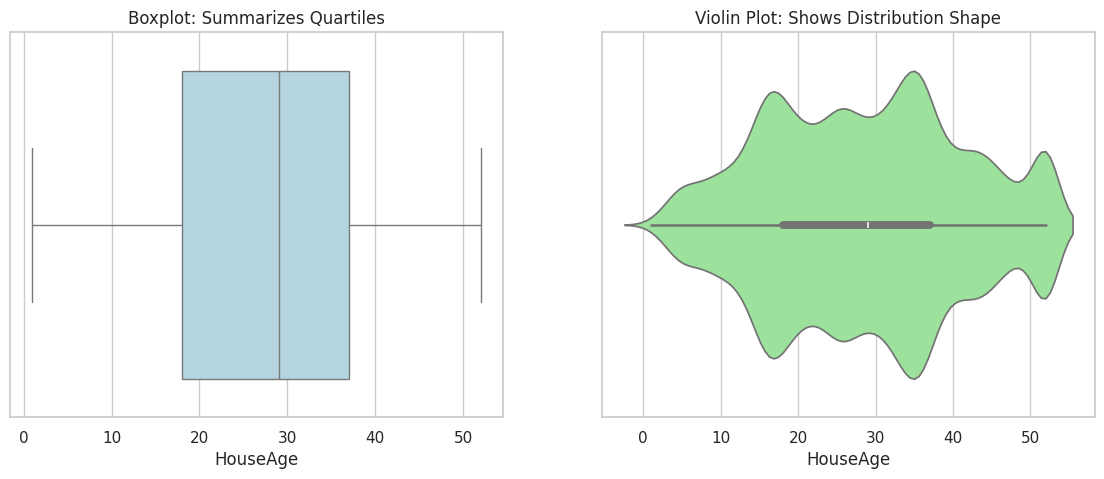

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Boxplot
sns.boxplot(x=df['HouseAge'], ax=ax[0], color='lightblue')
ax[0].set_title("Boxplot: Summarizes Quartiles")

# Plot 2: Violin Plot
sns.violinplot(x=df['HouseAge'], ax=ax[1], color='lightgreen')
ax[1].set_title("Violin Plot: Shows Distribution Shape")

plt.show()

**Reasoning:**
The boxplot shows us the median is ~29 years. The violin plot reveals a "wavy" texture—this might be due to specific housing boom eras (peaks in construction).

## 3. Bivariate Analysis: Relationships
Does `MedInc` (Median Income) predict `MedHouseVal` (Price)?

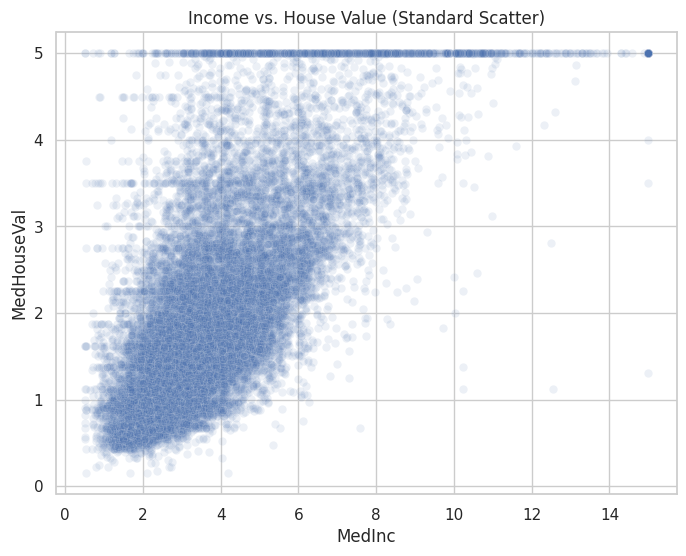

In [ ]:
# Standard Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.1)
plt.title("Income vs. House Value (Standard Scatter)")
plt.show()

**The Problem of Overplotting:**
With 20,000+ points, the black mass in the middle hides the density. We can't tell if there are 10 points or 10,000 points there.

**The Solution:** Hexbin Plot.

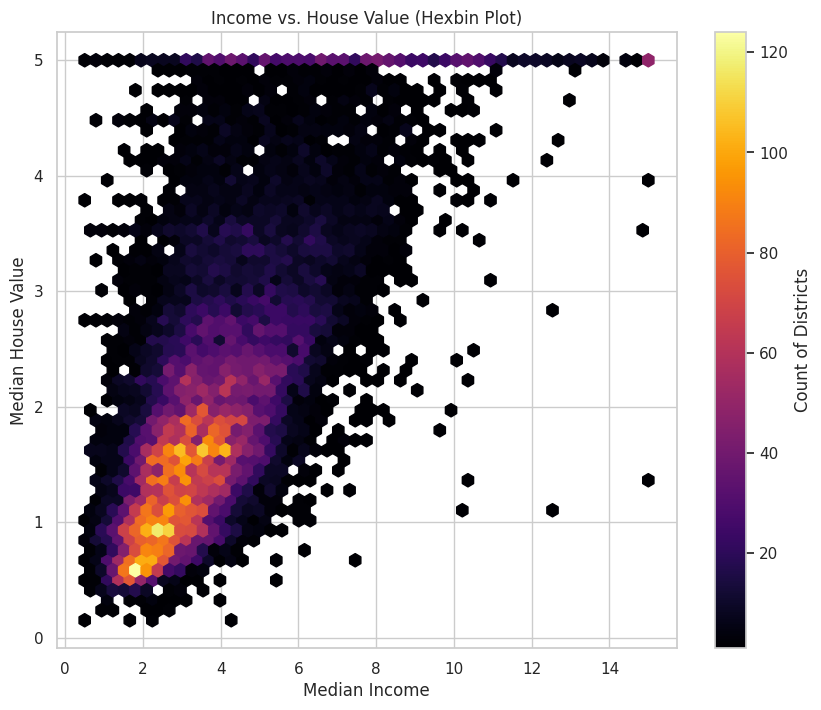

In [ ]:
# Hexbin plot handles overplotting by binning density
plt.figure(figsize=(10, 8))
plt.hexbin(df['MedInc'], df['MedHouseVal'], gridsize=50, cmap='inferno', mincnt=1)
plt.colorbar(label='Count of Districts')
plt.title("Income vs. House Value (Hexbin Plot)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

## 4. Correlation Analysis
Let's view the relationships between all numerical features.

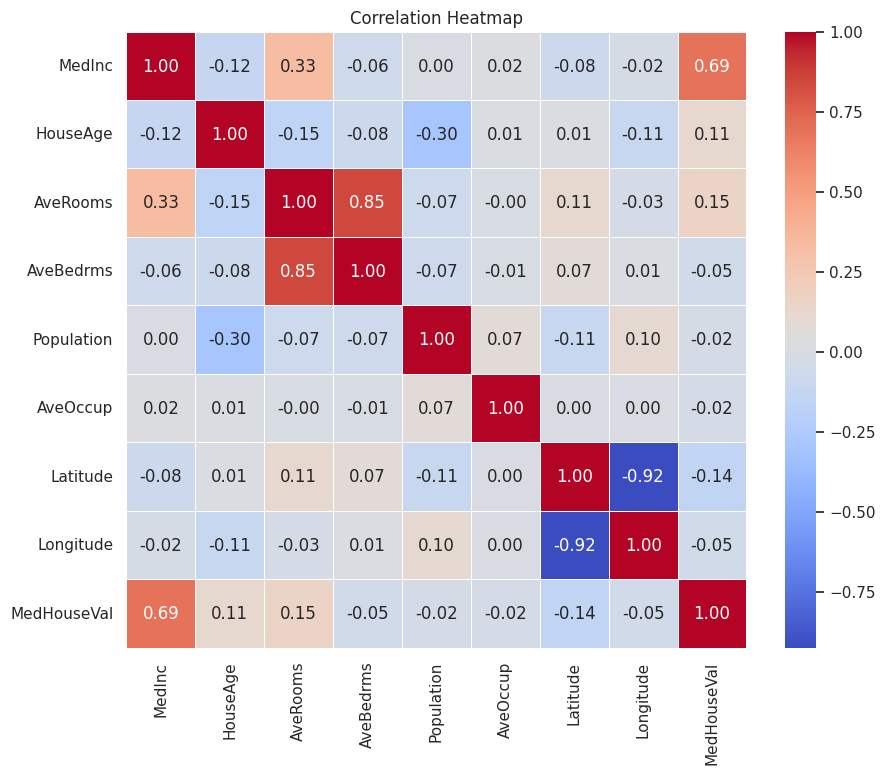

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Reasoning (Multicollinearity):**
* Look at `AveRooms` and `AveBedrms`. Correlation is **0.85**.
* This makes sense (more rooms usually means more bedrooms), but for a linear model, this is redundant information (Multicollinearity).

## 5. Geospatial Analysis
Since this is California, `Latitude` and `Longitude` matter. Let's visualize the "Map" of house prices.

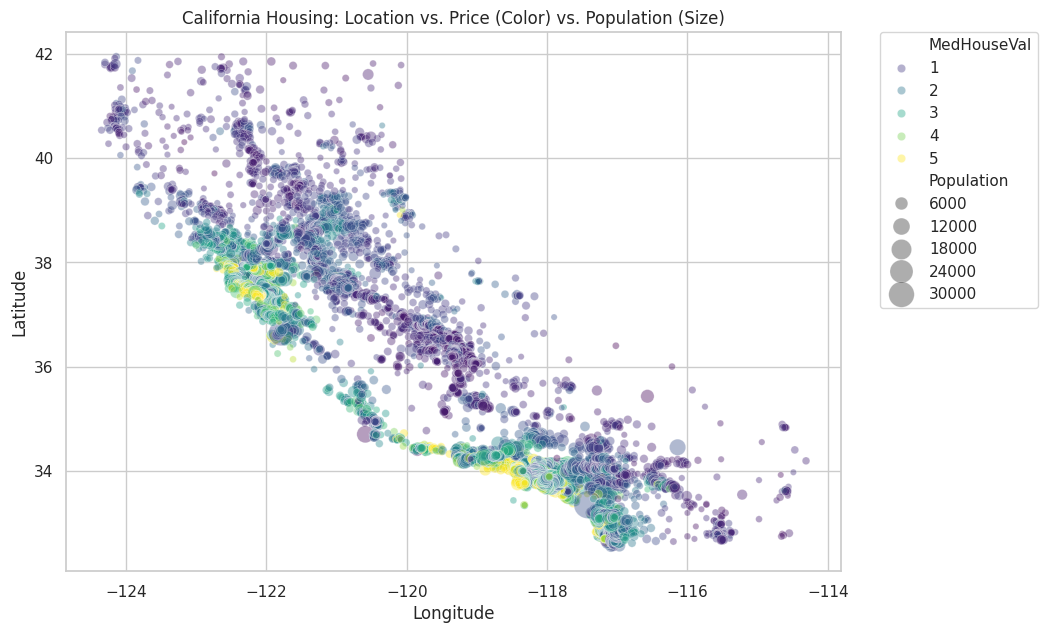

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x="Longitude", y="Latitude",
    size="Population", hue="MedHouseVal",
    sizes=(20, 400), palette="viridis", alpha=0.4
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("California Housing: Location vs. Price (Color) vs. Population (Size)")
plt.show()

**Conclusion:**
1.  **Geography matters:** The high prices (Yellow/Green) are clustered around the Bay Area (San Francisco) and Los Angeles.
2.  **Inland is cheaper:** The "Purple" line going down the right side is the Central Valley.
3.  **Density:** Larger circles (high population) correlate often with coastal areas.


**Final Takeaway for Students:**
We started with a raw table. Through visual EDA, we discovered:
* Data quality issues (Capped prices at 5.0).
* Structure issues (Outliers in Rooms).
* Strong geographic clusters.
This "mental model" is what you need *before* you ever train a machine learning model.